In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [9]:
def true_func(x: float) -> float:
    return np.cos(1.5 * np.pi * x)

In [10]:
degrees = [1, 2, 3, 4, 15, 20, 30]

x = np.arange(start=-0.75, stop=0.75, step=0.02)
y_true = true_func(x)
y = y_true + np.random.normal(loc=0.0, scale=2.0, size=len(x)) * 0.1

x = np.reshape(x, (len(x), 1))

In [11]:
print(x)
print(y)

[[-0.75]
 [-0.73]
 [-0.71]
 [-0.69]
 [-0.67]
 [-0.65]
 [-0.63]
 [-0.61]
 [-0.59]
 [-0.57]
 [-0.55]
 [-0.53]
 [-0.51]
 [-0.49]
 [-0.47]
 [-0.45]
 [-0.43]
 [-0.41]
 [-0.39]
 [-0.37]
 [-0.35]
 [-0.33]
 [-0.31]
 [-0.29]
 [-0.27]
 [-0.25]
 [-0.23]
 [-0.21]
 [-0.19]
 [-0.17]
 [-0.15]
 [-0.13]
 [-0.11]
 [-0.09]
 [-0.07]
 [-0.05]
 [-0.03]
 [-0.01]
 [ 0.01]
 [ 0.03]
 [ 0.05]
 [ 0.07]
 [ 0.09]
 [ 0.11]
 [ 0.13]
 [ 0.15]
 [ 0.17]
 [ 0.19]
 [ 0.21]
 [ 0.23]
 [ 0.25]
 [ 0.27]
 [ 0.29]
 [ 0.31]
 [ 0.33]
 [ 0.35]
 [ 0.37]
 [ 0.39]
 [ 0.41]
 [ 0.43]
 [ 0.45]
 [ 0.47]
 [ 0.49]
 [ 0.51]
 [ 0.53]
 [ 0.55]
 [ 0.57]
 [ 0.59]
 [ 0.61]
 [ 0.63]
 [ 0.65]
 [ 0.67]
 [ 0.69]
 [ 0.71]
 [ 0.73]]
[-9.44969814e-01 -7.20644905e-01 -1.04735807e+00 -8.69590129e-01
 -1.21187459e+00 -5.12820931e-01 -1.12911057e+00 -1.00611001e+00
 -6.33541789e-01 -6.64774860e-01 -9.41344809e-01 -6.18843676e-01
 -7.31457864e-01 -6.56796379e-01 -3.08614426e-01 -8.16423682e-01
 -1.97355607e-01 -1.27262631e-02 -3.63894576e-01  7.63012902e-02

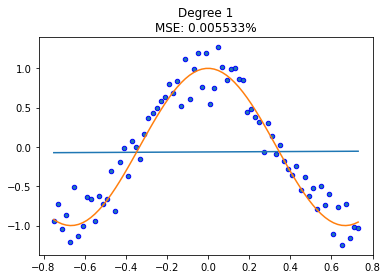

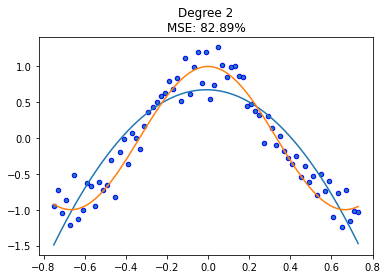

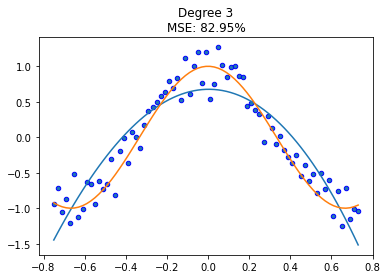

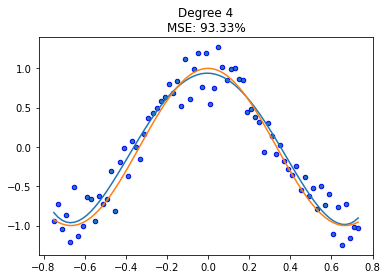

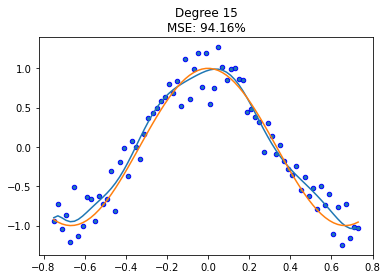

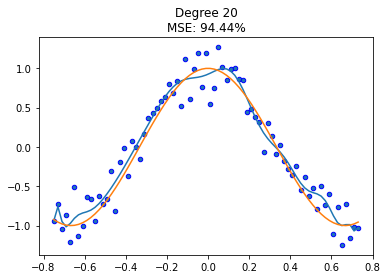

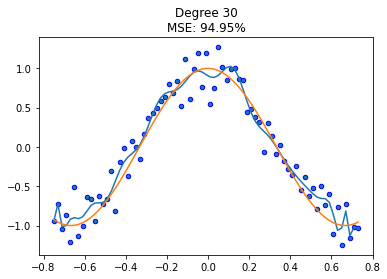

In [12]:
for i, deg in enumerate(degrees):
    fig, ax = plt.subplots()

    p_features = PolynomialFeatures(deg)
    regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial_features", p_features),
        ("linear_regression", regression)
    ])
    pipeline.fit(x, y)
    score = pipeline.score(x, y)
    y_pred = pipeline.predict(x)

    plt.plot(x, y_pred, label="Model")
    plt.plot(x, y_true, label="Actual Function")
    plt.scatter(x, y, edgecolor="b", s=20, label="Samples")
    plt.title(f"Degree {deg}\nMSE: {score*100:.4}%")
    plt.show()